<a href="https://colab.research.google.com/github/Arthurrrrrrrrrrrr/Apprentissage/blob/master/TP_data_preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP : Data preparation

La préparation des données est une étape fondamentale dans le cycle du machine learning. Selon les experts d’IBM, le data cleaning représentent près de 80% du temps des analystes et autres data scientists ! Des erreurs durant ces étapes peuvent mener à de mauvais fonctionnements ou de mauvaises performances très difficiles à déboguer.

## Import des librairies

In [2]:
import pandas as pd # Gestion des données
import seaborn as sns # outil de visualisation
import matplotlib.pyplot as plt # Librairie de visualisation
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler # Outil de preprocessing


In [3]:
# Import des librairies de métriques, encoding, preprocessing
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_percentage_error as mape

# Import des différents modèles de machine learning
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold, learning_curve
import xgboost as xgb
import lightgbm as lgbm

## Partie 1 : Prédiction de survie sur la base de données Titanic


Pour cette partie, nous allons travailler sur les données de la base de données publique "Titanic", qui porte sur la survie des passagers de ce naufrage.

L'objectif est d'entrainer un modèle capable de prédire si un passager a survécu lors du naufrage à partir des attributs disponibles

Téléchargement des données

In [4]:
train_df = pd.read_csv("https://raw.githubusercontent.com/CharlesDampeyrou/titanic/master/train.csv")
test_df = pd.read_csv("https://raw.githubusercontent.com/CharlesDampeyrou/titanic/master/test.csv")
df = pd.concat([train_df, test_df], axis=0).reset_index(drop=True)
train_length = train_df.shape[0]

La librairie Pandas permet de traiter des données tabulaire. Lorsque les données sont importées dans un objet 'pandas.DataFrame', nous pouvons visualiser les n premières lignes de ce "DataFrame" à l'aide de la méthode "head(n)".

In [5]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Chaque ligne représente une entité de nos données, chaque colonne représente un attribut.
Les attributs ont les significations suivantes :
- passengerId : identifiant unique par passager
- Survived : 1 si le passager a survecu, 0 sinon
- Pclass : Classe du passager (1, 2 ou 3)
- Name : nom
- Sex : sexe du passager
- Age : Age du passager, ".5" signifie qu'il s'agit d'une estimation
- SibSp : nombre de frères et soeurs à bord
- Parch : nombre d'enfants et parents à bord
- Ticket : numéro du ticket
- Fare : prix payé
- Cabin : numéro de cabine
- Embarked : lieu d'embarquement (Cherbourg, Queenstown ou Southampton)

In [6]:
### QUESTION 1 : De la même manière, il existe une méthode pour afficher les
### dernière lignes d'un DataFrame. La trouver et aficher les 11 dernières
###  lignes.

df.tail(11)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1298,1299,NaN,1,"Widener, Mr. George Dunton",male,50.0,1,1,113503,211.5000,C80,C
1299,1300,NaN,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
1300,1301,NaN,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
1301,1302,NaN,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
1302,1303,NaN,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q
1303,1304,NaN,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### Traitement des données problématiques

La méthode "duplicated()" permet de vérifier si une ligne a déjà été vue plus haut dans le DataFrame.

In [7]:
### QUESTION 2 : Vérifiez qu'il n'existe pas de doublons dans nos données.

df.duplicated().sum()

0

Dans les pandas DataFrame, les données manquantes sont notées NaN (pour Not a Number). La méthode "isnull()" permet de vérifier si les données sont des NaN.

In [8]:
### QUESTION 3 : Quelle est la proportion de données manquantes pour chacun des attributs ?

for attribut in df.columns :
  print(df[attribut].isnull().value_counts('True'))


False    1.0
Name: PassengerId, dtype: float64
False    0.680672
True     0.319328
Name: Survived, dtype: float64
False    1.0
Name: Pclass, dtype: float64
False    1.0
Name: Name, dtype: float64
False    1.0
Name: Sex, dtype: float64
False    0.799083
True     0.200917
Name: Age, dtype: float64
False    1.0
Name: SibSp, dtype: float64
False    1.0
Name: Parch, dtype: float64
False    1.0
Name: Ticket, dtype: float64
False    0.999236
True     0.000764
Name: Fare, dtype: float64
True     0.774637
False    0.225363
Name: Cabin, dtype: float64
False    0.998472
True     0.001528
Name: Embarked, dtype: float64


In [9]:
### QUESTION 4 : On peut remarquer qu'un attribut est particulièrement manquant, lequel ? Supprimer cette colonne.

df = df.drop(columns='Cabin')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S


L'attribut "Survived" comporte de nombreuses valeurs manquantes : il s'agit des valeurs pour le dataset de test.

In [10]:
### QUESTION 5 : Remplacer les valeurs manquantes pour l'age par l'age médian. On pourra s'intéresser à la méthode fillna.

med = df['Age']. median()
df = df.fillna(value={'Age' : med})
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,28.0,0,0,A.5. 3236,8.0500,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,28.0,0,0,359309,8.0500,S


In [11]:
### Question 6 : Remplacer les valeur manquantes pour le prix du billet par le prix moyen.

mean = df['Fare']. mean()
df = df.fillna(value={'Fare' : mean})
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,28.0,0,0,A.5. 3236,8.0500,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,28.0,0,0,359309,8.0500,S


In [12]:
### Question 7 : Remplacer les valeurs manquantes pour le lieu d'embarquement par le premier mode (valeur la plus fréquente).

mode = df['Embarked']. mode()
df = df.fillna(value={'Embarked' : mode})
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,28.0,0,0,A.5. 3236,8.0500,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,28.0,0,0,359309,8.0500,S


### Visualisation des données

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


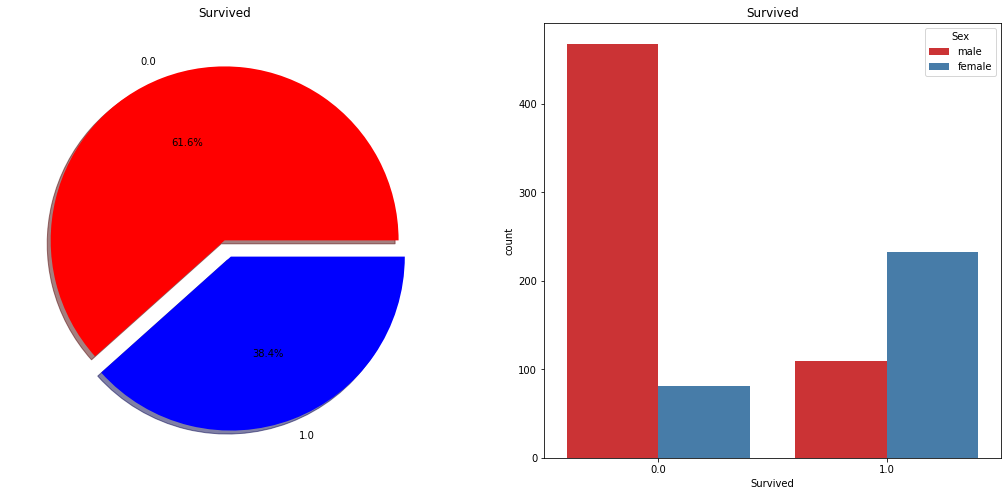

In [13]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0], colors = ['red', 'blue'],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=df,ax=ax[1],palette="Set1", hue = "Sex")
ax[1].set_title('Survived')
plt.show()

On observe que la sexe est une variable très corrélée à la survie des passagers.

,Survived
Pclass,
1,136.0
2,87.0
3,119.0


Text(0.5, 1.0, 'Pclass:Survived vs Dead')

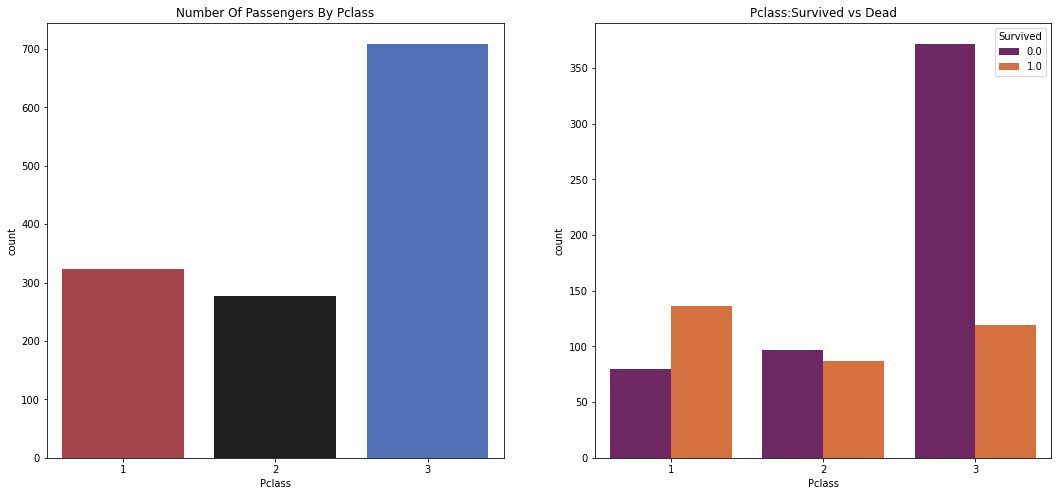

In [14]:
display(df.groupby("Pclass")[["Survived"]].sum())

f,ax=plt.subplots(1,2,figsize=(18,8))

sns.countplot(x='Pclass',data=df,ax=ax[0], palette = "icefire_r")
ax[0].set_title('Number Of Passengers By Pclass')

sns.countplot(x='Pclass',hue='Survived',data=df,ax=ax[1], palette = "inferno")
ax[1].set_title('Pclass:Survived vs Dead')


La classe ayant le plus de survivant est la classe 1, suivie par la 3ème classe puis la 2ème. Pourtant, la majorité des passagers étaient en 3ème classe. Plus le statut socio-économique des passagers était faible, plus grand était le risque qu'il ne survivent pas.

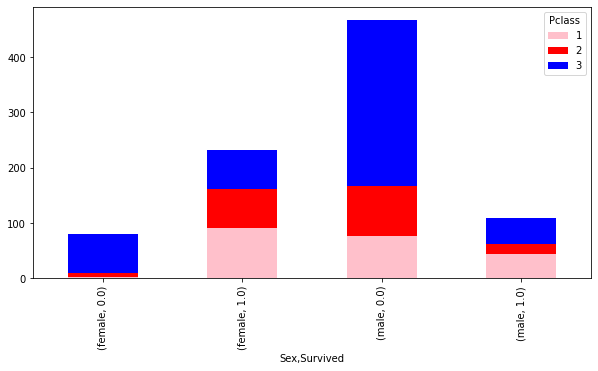

In [15]:
pd.crosstab([df.Sex,df.Survived],df.Pclass).plot.bar(stacked=True, color = ["pink","red", "blue"], figsize=(10,5))

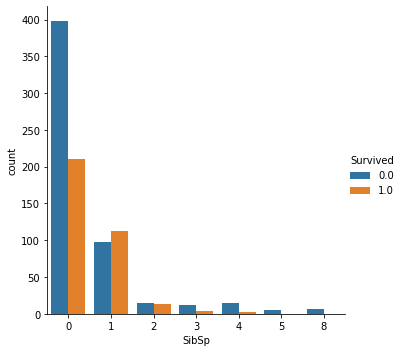

In [16]:
sns.catplot(data=df, x="SibSp", hue="Survived", kind="count" )

### Encodage des données




Tout d'abord, l'attribut "Sex" est constitué de 2 valeurs "male" et "female". Cet attribut peut être encodée de manière binaire.

La façon la plus rapide de réaliser cet encodage est d'utiliser des fonctions préexistantes. Le module preprocessing de la librairie sklearn permet de d'appliquer de nombreuses méthodes utiles en préprocessing. L'encodage de labels peut se faire de la manière suivante avec l'objet LabelEncoder du module preprocessing :
```python
lbe = LabelEncoder()
df["Sex"] = lbe.fit_transform(df["Sex"])
```
Nous n'allons cependant pas utiliser cette fonction afin de découvrir la méthode apply des DataFrames

In [17]:
### QUESTION 8 : Réaliser l'encodage de l'attribut "Sex" à l'aide de la méthode apply.

def sex(sex):
  if sex == 'female' :
    return 1
  return 0

df['Sex'] = df['Sex'].apply(sex)

df['Sex']

0       0
1       1
2       1
3       1
4       0
       ..
1304    0
1305    1
1306    0
1307    0
1308    0
Name: Sex, Length: 1309, dtype: int64

In [18]:
### QUESTION 9 : Lorsqu'un age est une estimation, 0.5 est ajouté à sa valeur.
### Par exemple, 22.5 signifie qu'on estime l'age de la personne à 22 ans. Créer
### un nouvel attribut "age_approximation" qui vaut 0 si l'age est connu, et 1
### si l'age est une approximation.

def approximation(age):
  if age%1 != 0 :
    return 1
  return 0

df['age_approximation'] = df['Age'].apply(approximation)

In [19]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,age_approximation
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,0
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,0
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",0,28.0,0,0,A.5. 3236,8.0500,S,0
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C,0
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,1
1307,1308,NaN,3,"Ware, Mr. Frederick",0,28.0,0,0,359309,8.0500,S,0


In [20]:
### QUESTION 10 : Arrondir l'age à l'entier inférieur
import math as m
df['Age'] = df['Age'].apply(m.ceil)

In [21]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,age_approximation
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,S,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C,0
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,S,0
4,5,0.0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",0,28,0,0,A.5. 3236,8.0500,S,0
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",1,39,0,0,PC 17758,108.9000,C,0
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",0,39,0,0,SOTON/O.Q. 3101262,7.2500,S,1
1307,1308,NaN,3,"Ware, Mr. Frederick",0,28,0,0,359309,8.0500,S,0


L'attribut "Embarked" présente 3 valeurs possibles, nous allons donc créer 3 nouveaux attributs "Embarked_C", "Embarked_Q" et "Embarked_S", qui prendront chacune la valeur 0 ou 1 selon le lieu d'embarquement du passager (fonction indicatrice).

QUESTION 11 : Comment s'appelle l'encodage que nous allons réaliser ?

One hot encoding

Nous pouvous remarquer que l'attribut "Embarked_C" peut être déduit des attributs "Embarked_Q" et "Embarked_S". Il n'est donc pas nécessaire de l'ajouter à notre DataFrame.

In [22]:
### QUESTION 12 : Se renseigner sur la fonction get_dummies de pandas. Réaliser
### l'encodage de "Embarked_Q" et "Embarked_S" à l'aide de cette fonction. On 
### pourra utiliser l'argument "drop_first=True" pour ne pas ajouter l'encodage
### de "Embarked_C".

df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)


### Feature selection

Quelques attributs ne semblent pas avoir d'utilité, nous allons donc les supprimer. Le nom, le numéro de ticket et l'identifiant de passager ne nous apportent pas d'information, supprimons les.

In [24]:
### QUESTION 13 : Supprimer le nom, le numéro de ticket et l'identifiant de passager.

df.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)

### Division du dataset en un ensemble de données d'entrainement et un ensemble de données de test

In [25]:
train_length

df_train = df[:train_length]
df_test = df[train_length:]

Notre problème est un problème de classification à 2 classes portant sur l'attribut "Survived"

In [34]:
X_train = df_train.drop("Survived", axis=1)
y_train = df_train["Survived"]

X_test = df_test.drop("Survived", axis=1)

In [37]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,age_approximation,Embarked_Q,Embarked_S
0,1.0,0.0,0.265823,0.125,0.000000,0.014151,0.0,0.0,1.0
1,0.0,1.0,0.468354,0.125,0.000000,0.139136,0.0,0.0,0.0
2,1.0,1.0,0.316456,0.000,0.000000,0.015469,0.0,0.0,1.0
3,0.0,1.0,0.430380,0.125,0.000000,0.103644,0.0,0.0,1.0
4,1.0,0.0,0.430380,0.000,0.000000,0.015713,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
886,0.5,0.0,0.329114,0.000,0.000000,0.025374,0.0,0.0,1.0
887,0.0,1.0,0.227848,0.000,0.000000,0.058556,0.0,0.0,1.0
888,1.0,1.0,0.341772,0.125,0.333333,0.045771,0.0,0.0,1.0
889,0.0,0.0,0.316456,0.000,0.000000,0.058556,0.0,0.0,0.0


### Normalisation

Une méthode rapide afin de normaliser des données est d'utiliser le StandardScaler du module sklearn.preprocessing. Nous allons cependant faire les calculs sans passer par cette fonction.

In [36]:
### QUESTION 14 : Normaliser les données X_train et X_test sans utiliser le StandardScaler

for column in X_train.columns:
    X_train[column] = (X_train[column] - X_train[column].min() ) / (X_train[column].max() - X_train[column].min())

for column in X_test.columns:
    X_test[column] = (X_test[column] - X_test[column].min() ) / (X_test[column].max() - X_test[column].min())

Autre solution :
```python
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
```

### Test de la précision avec plusieurs modèles

In [38]:
kfold = StratifiedKFold(n_splits=10)
random_state = 6

logistic_model = LogisticRegression(solver='lbfgs', max_iter=400,random_state=random_state)
knn_model = KNeighborsClassifier()
decision_model = DecisionTreeClassifier(random_state=random_state)
mlp_model = MLPClassifier(random_state=random_state)
gaussian_model = GaussianNB()
linear_svm_model = SVC(kernel='linear')
adaboost_model = AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state, learning_rate=0.1)
randomforest_model = RandomForestClassifier(random_state=random_state)
extra_model = ExtraTreesClassifier(random_state=random_state)
gb_model = GradientBoostingClassifier(random_state=random_state)
xgb_model = xgb.XGBClassifier()
lgbm_model = lgbm.LGBMClassifier()

model_names = ["Logistic","Knn","DecisionTree","MLP","GaussianNB","SupportVectorMachine","AdaBoost","RandomForest","ExtraTrees","GradientBoost","Xgboost","Lightgbm"]
model_list = [logistic_model,decision_model,mlp_model,knn_model,gaussian_model,linear_svm_model,adaboost_model,randomforest_model,extra_model,gb_model,xgb_model,lgbm_model]
results = []
for i in model_list:
    result = cross_val_score(i, X_train, y_train, scoring = "accuracy", cv = kfold, n_jobs=4)
    results.append(result.mean())

acc_of_models = {"Model": model_names, "Mean Accuracy": results}    
acc_of_models = pd.DataFrame(acc_of_models)
acc_of_models

,Model,Mean Accuracy
0,Logistic,0.795743
1,Knn,0.782310
2,DecisionTree,0.797953
3,MLP,0.791286
4,GaussianNB,0.780050
5,SupportVectorMachine,0.786729
6,AdaBoost,0.786829
7,RandomForest,0.810400
8,ExtraTrees,0.798015
9,GradientBoost,0.831685


Réimportez les données dans un Dataframe, entrainez ces modèles sans data préparation, conclure sur l'influence de la préparation sur les performances des modèles.

In [46]:
### Import données
X_train = pd.read_csv("https://raw.githubusercontent.com/CharlesDampeyrou/titanic/master/train.csv")
X_test = pd.read_csv("https://raw.githubusercontent.com/CharlesDampeyrou/titanic/master/test.csv")
df = pd.concat([train_df, test_df], axis=0).reset_index(drop=True)
train_length = train_df.shape[0]
df_train = df[:train_length]
df_test = df[train_length:]

y_train = df_train['Survived']
X_train = df_train.drop(columns=['Survived','Name','Ticket','Embarked'])

X_test = df_test.drop(columns=['Survived','Name','Ticket','Embarked'])

### Test modèles

kfold = StratifiedKFold(n_splits=10)
random_state = 6

logistic_model = LogisticRegression(solver='lbfgs', max_iter=400,random_state=random_state)
knn_model = KNeighborsClassifier()
decision_model = DecisionTreeClassifier(random_state=random_state)
mlp_model = MLPClassifier(random_state=random_state)
gaussian_model = GaussianNB()
linear_svm_model = SVC(kernel='linear')
adaboost_model = AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state, learning_rate=0.1)
randomforest_model = RandomForestClassifier(random_state=random_state)
extra_model = ExtraTreesClassifier(random_state=random_state)
gb_model = GradientBoostingClassifier(random_state=random_state)
xgb_model = xgb.XGBClassifier()
lgbm_model = lgbm.LGBMClassifier()

model_names = ["Logistic","Knn","DecisionTree","MLP","GaussianNB","SupportVectorMachine","AdaBoost","RandomForest","ExtraTrees","GradientBoost","Xgboost","Lightgbm"]
model_list = [logistic_model,decision_model,mlp_model,knn_model,gaussian_model,linear_svm_model,adaboost_model,randomforest_model,extra_model,gb_model,xgb_model,lgbm_model]
results = []
for i in model_list:
    result = cross_val_score(i, X_train, y_train, scoring = "accuracy", cv = kfold, n_jobs=4)
    results.append(result.mean())

acc_of_models = {"Model": model_names, "Mean Accuracy": results}    
acc_of_models = pd.DataFrame(acc_of_models)
acc_of_models

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1514, in fit
    accept_large_sparse=solver not in ["liblinear", "sag", "saga"],
  File "/usr/local/lib/python3.7/dist-packages/sklearn/base.py", line 581, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/l

,Model,Mean Accuracy
0,Logistic,NaN
1,Knn,NaN
2,DecisionTree,NaN
3,MLP,NaN
4,GaussianNB,NaN
5,SupportVectorMachine,NaN
6,AdaBoost,NaN
7,RandomForest,NaN
8,ExtraTrees,NaN
9,GradientBoost,NaN


### Conclusion sur l'influence de la préparation sur les performances des différents modèles

c b1

## Partie 2 : Prédiction de la consommation électrique française

L'objectif dans cette partie est de prédire la consommation electrique française.

### Chargement des données

In [47]:
df = pd.read_csv("https://raw.github.com/CharlesDampeyrou/titanic/master/RTE_with_exogene_features.csv")

In [48]:
df = df[['Datetime', 'Température (°C) | Auvergne-Rhône-Alpes',
       'Température (°C) | Bourgogne-Franche-Comté',
       'Température (°C) | Bretagne', 'Température (°C) | Centre-Val de Loire',
       'Température (°C) | Grand Est', 'Température (°C) | Hauts-de-France',
       'Température (°C) | Normandie', 'Température (°C) | Nouvelle-Aquitaine',
       'Température (°C) | Occitanie', 'Température (°C) | Pays de la Loire',
       "Température (°C) | Provence-Alpes-Côte d'Azur",
       'Température (°C) | Île-de-France',
       'Nebulosité totale (%) | Auvergne-Rhône-Alpes',
       'Nebulosité totale (%) | Bourgogne-Franche-Comté',
       'Nebulosité totale (%) | Bretagne',
       'Nebulosité totale (%) | Centre-Val de Loire',
       'Nebulosité totale (%) | Grand Est',
       'Nebulosité totale (%) | Hauts-de-France',
       'Nebulosité totale (%) | Normandie',
       'Nebulosité totale (%) | Nouvelle-Aquitaine',
       'Nebulosité totale (%) | Occitanie',
       'Nebulosité totale (%) | Pays de la Loire',
       "Nebulosité totale (%) | Provence-Alpes-Côte d'Azur",
       'Nebulosité totale (%) | Île-de-France',
       'Consommation (MW) | Auvergne-Rhône-Alpes',
       'Consommation (MW) | Bourgogne-Franche-Comté',
       'Consommation (MW) | Bretagne',
       'Consommation (MW) | Centre-Val de Loire',
       'Consommation (MW) | Grand Est', 'Consommation (MW) | Hauts-de-France',
       'Consommation (MW) | Normandie',
       'Consommation (MW) | Nouvelle-Aquitaine',
       'Consommation (MW) | Occitanie', 'Consommation (MW) | Pays de la Loire',
       "Consommation (MW) | Provence-Alpes-Côte d'Azur",
       'Consommation (MW) | Île-de-France',
       'Vacances scolaires | Bourgogne-Franche-Comté',
       'Vacances scolaires | Bretagne',
       'Vacances scolaires | Centre-Val de Loire',
       'Vacances scolaires | Grand Est',
       'Vacances scolaires | Hauts-de-France',
       'Vacances scolaires | Île-de-France', 'Vacances scolaires | Normandie',
       'Vacances scolaires | Nouvelle-Aquitaine',
       'Vacances scolaires | Occitanie',
       'Vacances scolaires | Pays de la Loire',
       "Vacances scolaires | Provence-Alpes-Côte d'Azur",
       'Vacances scolaires | Auvergne-Rhône-Alpes', 
       'Jour férié',]]

In [49]:
df["Datetime"] = pd.to_datetime(df["Datetime"])
df.set_index("Datetime", inplace=True)
df["Datetime"] = df.index

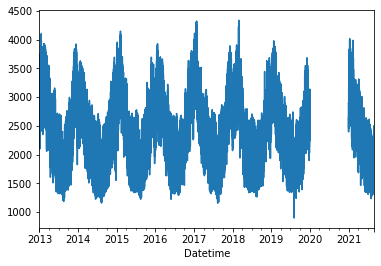

In [50]:
df['Consommation (MW) | Bourgogne-Franche-Comté'].plot()

On observe qu'il manque les données pour l'année 2020, nous allons donc travailler sur la période 2013-2019.

In [51]:
df = df["2013":"2019"]

### Visualisation des données

In [52]:
pd.options.plotting.backend = "plotly"

In [53]:
def get_regions(): # N'hésitez pas à réutiliser cette fonction.
    return ([
            "Bourgogne-Franche-Comté",
            "Bretagne",
            "Centre-Val de Loire",
            "Grand Est",
            "Hauts-de-France",
            "Île-de-France",
            "Normandie",
            "Nouvelle-Aquitaine",
            "Occitanie",
            "Pays de la Loire",
            "Provence-Alpes-Côte d'Azur",
            "Auvergne-Rhône-Alpes",
        ])

In [57]:
### QUESTION 15 : Créer une colonne "Consommation France (MW)" qui comporte la
### somme des consommations de toutes les régions

df["Consommation France (MW)"] = sum(df['Consommation (MW) | '+Region] for Region in get_regions())

In [58]:
df[["Consommation France (MW)", "Datetime"]].plot(x="Datetime", y="Consommation France (MW)")

QUESTION 16 : On observe une anomalie touts les ans, une idée sur son origine?

QUESTION 17 : Regarder le graphe à plusieurs échelles. Citer des attributs temporels qui semblent avoir de l'importance.

### Traitement des données manquantes

In [ ]:
### QUESTION 18 : Afficher le nombre de données manquantes dans le DataFrame en
### fonction des attributs. Il s'agit des anomalies détectées question 14


for attribut in df.columns:


In [ ]:
### Question 19 : Le nombre de valeurs manquantes est faible, les remplacer par 
### une interpolation linéaire. Calculer à nouveau la consommation totale pour
### prendre en compte les modifications

# À COMPLÉTER

### Encodage des données

In [ ]:
### QUESTION 20 : Créer des attributs "hour_sin" et "hour_cos" qui comportent 
### l'heure du jour après une transformation par les fonctions cosinus et sinus.

# À COMPLÉTER

In [ ]:
### QUESTION 21 : De même, créer les attributs "weekday_cos", "weekday_sin",
### "week_cos" et "week_sin"

# À COMPLÉTER

### Sélection des features

In [ ]:
### QUESTION 22 : Créer un dataframe X comportant la température, la nébulosité,
### l'heure (en encodage cos et sin), le jour de la semaine (en encodage cos et
### sin), la semaine de l'année (en encodage cos et sin), les vacances scolaires
###  et la variable jour férié. Créer un dataframe y comportant la consommation
### totale française.

# À COMPLÉTER

### Séparation train / test

In [ ]:
### QUESTION 23 : Séparer les données en un ensemble d'entrainement (années 2013
### à 2017) et un ensemble de test (2018 et 2019)

# À COMPLÉTER

### Normalisation des données

Afin de pouvoir calculer la MAPE (mean absolute percentage error) sans devoir dénormaliser les données, nous allons faire une normalisation "MaxAbs" pour y, c'est à dire diviser les données par le maximum de la valeur absolue.

In [ ]:
### QUESTION 24 : centrer et réduire X_train et X_test

# À COMPLÉTER

In [ ]:
### QUESTION 25 : Faire une normalisation maxabs sur y_train et y_test

# À COMPLÉTER

### Entrainement et évaluation de performences

In [ ]:
model = MLPRegressor()
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)
error = mape(y_test.values, y_pred)
print(f"Erreur moyenne : {error}%")

Question 26 : Ajouter la température moyenne sur les dernières 24h et observer la différence de performances.

Conclure sur l'intérêt de ce nouvel attribut et sur l'importance 